In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Dataset/#15.csv')

# Drop the original "record_time" column
df = df.drop(columns=['record_time'])

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_file_time.csv', index=False)

In [2]:
# Read the CSV file
df = pd.read_csv('modified_file.csv')


In [3]:
# Group by the "simplified_time" column, calculate the mean of other columns, and reset the index
df_means = df.groupby('record_time').mean().reset_index()

In [4]:
# Save the DataFrame with means to a new CSV file
df_means.to_csv('modified_file_with_means.csv', index=False)

In [5]:
import pandas as pd

# Load your CSV data
df = pd.read_csv('modified_file.csv')

# Convert 'simplified_time' to a datetime object
df['record_time'] = pd.to_datetime(df['record_time'], format='%Y-%m-%d')

# Group the data by day and calculate the daily SoH
daily_soh = df.groupby(df['record_time'].dt.date)['available_capacity (Ah)'].mean()

# Calculate the rated capacity of the battery (replace with your battery's rated capacity)
rated_capacity_ah = 120.0  # Example value, replace with your battery's rated capacity

# Calculate the daily SoH as a percentage
daily_soh_percentage = (daily_soh / rated_capacity_ah) * 100.0

# Convert the daily SoH Series to a list
daily_soh_list = daily_soh_percentage.tolist()

# Print the list (optional)
print(daily_soh_list)

[59.09166666666666, 58.358333333333334, 82.43333333333334, 62.3, 78.93333333333334, 51.475, 77.45833333333334, 80.66666666666666, 78.74166666666666, 80.10833333333332, 58.45, 61.77499999999999, 60.03333333333334, 82.91666666666667, 47.61666666666667, 85.925, 78.96666666666667, 72.375, 76.475, 75.625, 70.90833333333335, 86.98333333333333, 84.95, 61.133333333333326, 79.4, 46.199999999999996, 69.0, 95.03333333333333, 84.21666666666667, 74.31666666666668, 86.53333333333335, 74.99166666666667, 74.43333333333332, 76.8, 75.44166666666666, 82.94166666666666, 13.916666666666666, 77.74166666666667, 88.61666666666666, 86.98333333333333, 80.19166666666668, 81.16666666666667, 76.75833333333333, 103.89166666666667, 63.708333333333336, 66.53333333333333, 88.28333333333333, 67.84166666666667, 50.79166666666667, 67.45833333333333, 79.65833333333333, 61.391666666666666, 74.075, 80.00833333333334, 76.97500000000001, 82.45833333333333, 81.99166666666666, 73.86666666666667, 72.075, 79.2, 71.95833333333333,

In [6]:
print(daily_soh)

record_time
2019-07-26    70.91
2019-07-27    70.03
2019-07-28    98.92
2019-07-30    74.76
2019-07-31    94.72
              ...  
2021-11-11    91.75
2021-11-12    75.72
2021-11-13    85.93
2021-11-14    73.85
2021-11-15    82.86
Name: available_capacity (Ah), Length: 796, dtype: float64


In [7]:
print(len(daily_soh_list))

796


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have daily SoH values in the 'daily_soh_list' variable

# Step 1: Preprocess the data
def create_sequences(data, window_size):
    sequences = []
    target = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        target.append(data[i+window_size])
    return np.array(sequences), np.array(target)

window_size = 7  # Choose an appropriate window size for your data
X, y = create_sequences(daily_soh_list, window_size)

# Split the data into training and testing sets
split_ratio = 0.8  # Adjust as needed
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 2: Define and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # You can choose an appropriate loss function

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Step 3: Make predictions
y_pred = model.predict(X_test)


Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 5270.3828 - val_loss: 4836.2246
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 4582.3691 - val_loss: 4069.2788
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 3438.5994 - val_loss: 2269.0649
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 1113.0759 - val_loss: 196.3639
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 250.1732 - val_loss: 104.1492
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 113.3649 - val_loss: 108.8857
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 106.1584 - val_loss: 92.8566
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 100.6667 - val_loss: 94.1009
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 98.9385 - val_loss: 92.5190
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - l

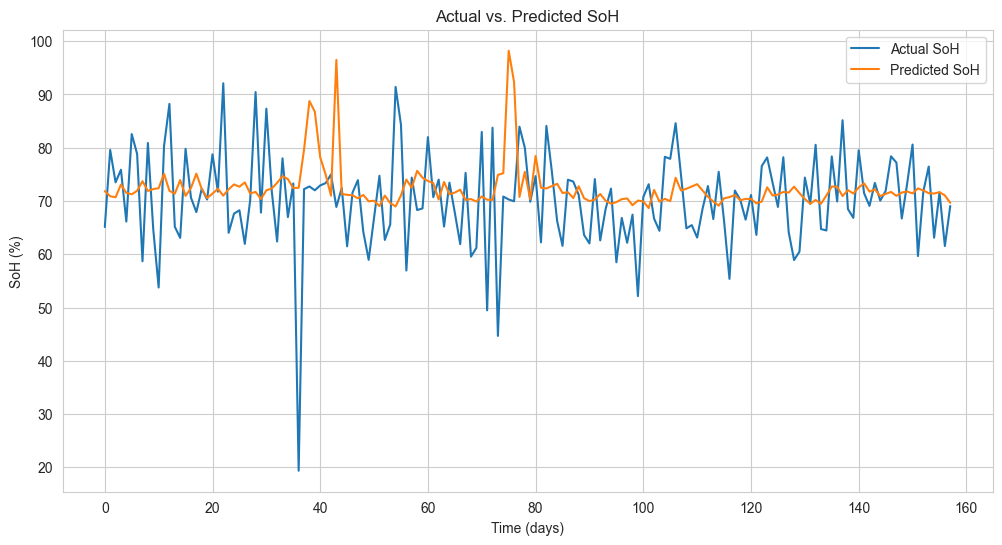

In [9]:
# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual SoH')
plt.plot(y_pred, label='Predicted SoH')
plt.xlabel('Time (days)')
plt.ylabel('SoH (%)')
plt.title('Actual vs. Predicted SoH')
plt.legend()
plt.show()

Epoch 1/100 - Train Loss: 0.2447 - Val Loss: 0.1833
Epoch 2/100 - Train Loss: 0.1509 - Val Loss: 0.0959
Epoch 3/100 - Train Loss: 0.0672 - Val Loss: 0.0220
Epoch 4/100 - Train Loss: 0.0209 - Val Loss: 0.0180
Epoch 5/100 - Train Loss: 0.0234 - Val Loss: 0.0110
Epoch 6/100 - Train Loss: 0.0182 - Val Loss: 0.0118
Epoch 7/100 - Train Loss: 0.0177 - Val Loss: 0.0108
Epoch 8/100 - Train Loss: 0.0167 - Val Loss: 0.0101
Epoch 9/100 - Train Loss: 0.0161 - Val Loss: 0.0101
Epoch 10/100 - Train Loss: 0.0166 - Val Loss: 0.0101
Epoch 11/100 - Train Loss: 0.0149 - Val Loss: 0.0101
Epoch 12/100 - Train Loss: 0.0149 - Val Loss: 0.0100
Epoch 13/100 - Train Loss: 0.0144 - Val Loss: 0.0099
Epoch 14/100 - Train Loss: 0.0147 - Val Loss: 0.0101
Epoch 15/100 - Train Loss: 0.0148 - Val Loss: 0.0099
Epoch 16/100 - Train Loss: 0.0143 - Val Loss: 0.0099
Epoch 17/100 - Train Loss: 0.0153 - Val Loss: 0.0100
Epoch 18/100 - Train Loss: 0.0152 - Val Loss: 0.0100
Epoch 19/100 - Train Loss: 0.0156 - Val Loss: 0.0099
Ep

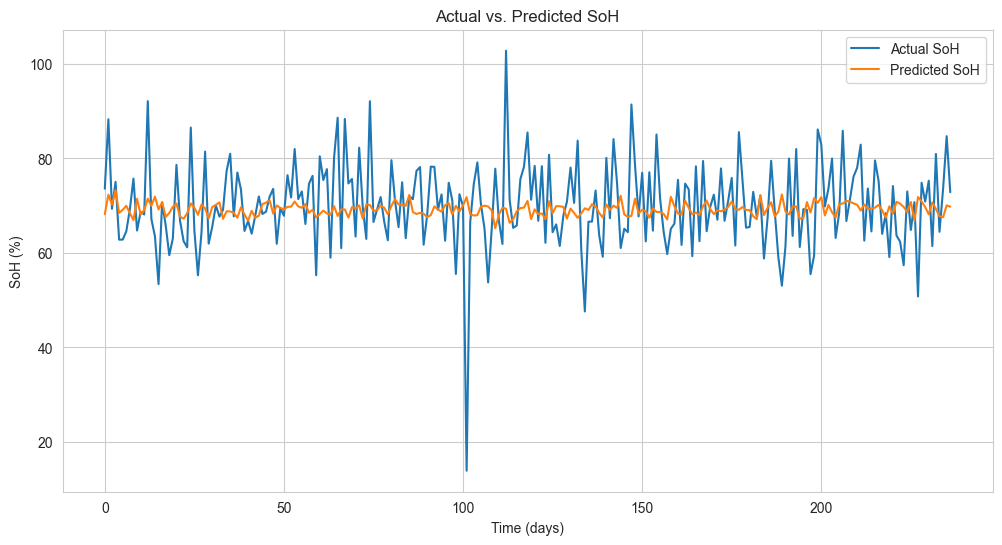

Epoch 1/100 - Train Loss: 0.2447 - Val Loss: 0.1833
Epoch 2/100 - Train Loss: 0.1509 - Val Loss: 0.0959
Epoch 3/100 - Train Loss: 0.0672 - Val Loss: 0.0220
Epoch 4/100 - Train Loss: 0.0209 - Val Loss: 0.0180
Epoch 5/100 - Train Loss: 0.0234 - Val Loss: 0.0110
Epoch 6/100 - Train Loss: 0.0182 - Val Loss: 0.0118
Epoch 7/100 - Train Loss: 0.0177 - Val Loss: 0.0108
Epoch 8/100 - Train Loss: 0.0167 - Val Loss: 0.0101
Epoch 9/100 - Train Loss: 0.0161 - Val Loss: 0.0101
Epoch 10/100 - Train Loss: 0.0166 - Val Loss: 0.0101
Epoch 11/100 - Train Loss: 0.0149 - Val Loss: 0.0101
Epoch 12/100 - Train Loss: 0.0149 - Val Loss: 0.0100
Epoch 13/100 - Train Loss: 0.0144 - Val Loss: 0.0099
Epoch 14/100 - Train Loss: 0.0147 - Val Loss: 0.0101
Epoch 15/100 - Train Loss: 0.0148 - Val Loss: 0.0099
Epoch 16/100 - Train Loss: 0.0143 - Val Loss: 0.0099
Epoch 17/100 - Train Loss: 0.0153 - Val Loss: 0.0100
Epoch 18/100 - Train Loss: 0.0152 - Val Loss: 0.0100
Epoch 19/100 - Train Loss: 0.0156 - Val Loss: 0.0099
Ep

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import psutil
import time

# Assuming 'daily_soh_list' contains your list of daily SoH percentages

# Convert the list to a numpy array
daily_soh_array = np.array(daily_soh_list).reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
daily_soh_normalized = scaler.fit_transform(daily_soh_array)

# Define a function to create the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2, input_shape=(7, 1)):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Choose the window size for input sequences (you can tune this)
window_size = 7

# Create input sequences and target values
X, y = create_sequences(daily_soh_normalized, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and compile the LSTM model
lstm_model = create_lstm_model(units=50, dropout_rate=0.2, input_shape=(window_size, 1))

# Lists to store training and validation errors
train_errors = []
val_errors = []

# Define the number of epochs
epochs = 100

# Measure the start time
start_time = time.time()

# Start monitoring CPU usage
start_cpu_usage = psutil.cpu_percent(interval=None)  # Initial CPU usage percentage

# Training loop
for epoch in range(epochs):
    history = lstm_model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)
    
    # Record training and validation errors for each epoch
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    train_errors.append(train_loss)
    val_errors.append(val_loss)
    
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

# Measure the end time
end_time = time.time()

# End monitoring CPU usage
end_cpu_usage = psutil.cpu_percent(interval=None)  # Final CPU usage percentage

# Make predictions using the model
y_pred = lstm_model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual SoH')
plt.plot(y_pred, label='Predicted SoH')
plt.xlabel('Time (days)')
plt.ylabel('SoH (%)')
plt.title('Actual vs. Predicted SoH')
plt.legend()
plt.show()

# Print the training and validation errors for each epoch
for epoch, (train_err, val_err) in enumerate(zip(train_errors, val_errors)):
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_err:.4f} - Val Loss: {val_err:.4f}")
    
# Calculate the processing time
processing_time = end_time - start_time

print(f"Processing Time: {processing_time:.2f} seconds")

# Calculate the training duration in seconds
training_duration = time.time() - start_time

# Calculate the average CPU usage during training
average_cpu_usage = (start_cpu_usage + end_cpu_usage) / 2.0

# Assuming a CPI value (cycles per instruction) of 1 (simplified example)
cpi = 1

# Calculate estimated CPU cycles consumed during training
estimated_cpu_cycles = (average_cpu_usage / 100) * cpi * training_duration

print(f"Estimated CPU Cycles Consumed: {estimated_cpu_cycles:.2f} cycles")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming 'daily_soh_list' contains your list of daily SoH percentages

# Convert the list to a numpy array
daily_soh_array = np.array(daily_soh_list).reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
daily_soh_normalized = scaler.fit_transform(daily_soh_array)

# Define a function to create the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2, input_shape=(7, 1)):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Choose the window size for input sequences (you can tune this)
window_size = 7

# Create input sequences and target values
X, y = create_sequences(daily_soh_normalized, window_size)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and compile the LSTM model
lstm_model = create_lstm_model(units=50, dropout_rate=0.2, input_shape=(window_size, 1))

# Lists to store training and validation errors
train_losses = []
val_losses = []
train_maes = []
val_maes = []
train_mapes = []
val_mapes = []
train_rmses = []
val_rmses = []

# Define the number of epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    history = lstm_model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=0)
    
    # Record training and validation losses for each epoch
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Calculate and record training and validation MAE
    train_preds = lstm_model.predict(X_train)
    val_preds = lstm_model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, train_preds)
    val_mae = mean_absolute_error(y_test, val_preds)
    
    train_maes.append(train_mae)
    val_maes.append(val_mae)
    
    # Calculate and record training and validation MAPE
    train_actual = scaler.inverse_transform(y_train)
    val_actual = scaler.inverse_transform(y_test)
    
    train_pred_unscaled = scaler.inverse_transform(train_preds)
    val_pred_unscaled = scaler.inverse_transform(val_preds)
    
    train_mape = np.mean(np.abs((train_actual - train_pred_unscaled) / train_actual)) * 100
    val_mape = np.mean(np.abs((val_actual - val_pred_unscaled) / val_actual)) * 100
    
    train_mapes.append(train_mape)
    val_mapes.append(val_mape)
    
    # Calculate and record training and validation RMSE
    train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred_unscaled))
    val_rmse = np.sqrt(mean_squared_error(val_actual, val_pred_unscaled))
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
    
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train MAE: {train_mae:.4f} - Val MAE: {val_mae:.4f} - Train MAPE: {train_mape:.4f}% - Val MAPE: {val_mape:.4f}% - Train RMSE: {train_rmse:.4f} - Val RMSE: {val_rmse:.4f}")

# Continue with making predictions, inverse transforming, and visualization as before.

# Print the detailed error rates for each epoch
for epoch, (train_loss, val_loss, train_mae, val_mae, train_mape, val_mape, train_rmse, val_rmse) in enumerate(
    zip(train_losses, val_losses, train_maes, val_maes, train_mapes, val_mapes, train_rmses, val_rmses)):
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train MAE: {train_mae:.4f} - Val MAE: {val_mae:.4f} - Train MAPE: {train_mape:.4f}% - Val MAPE: {val_mape:.4f}% - Train RMSE: {train_rmse:.4f} - Val RMSE: {val_rmse:.4f}")


5/5 [==============================] - 0s 2ms/step
Epoch 1/100 - Train Loss: 0.3422 - Val Loss: 0.2715 - Train MAE: 0.5132 - Val MAE: 0.5121 - Train MAPE: 67.6135% - Val MAPE: 67.8551% - Train RMSE: 48.9861 - Val RMSE: 48.8468
5/5 [==============================] - 0s 1ms/step
Epoch 2/100 - Train Loss: 0.2279 - Val Loss: 0.1700 - Train MAE: 0.4016 - Val MAE: 0.4021 - Train MAPE: 52.6212% - Val MAPE: 53.4700% - Train RMSE: 38.7203 - Val RMSE: 38.6504
5/5 [==============================] - 0s 2ms/step
Epoch 3/100 - Train Loss: 0.1297 - Val Loss: 0.0774 - Train MAE: 0.2610 - Val MAE: 0.2631 - Train MAPE: 33.7983% - Val MAPE: 35.3101% - Train RMSE: 26.0296 - Val RMSE: 26.0747
5/5 [==============================] - 0s 1ms/step
Epoch 4/100 - Train Loss: 0.0502 - Val Loss: 0.0156 - Train MAE: 0.0963 - Val MAE: 0.0921 - Train MAPE: 12.5843% - Val MAPE: 13.5169% - Train RMSE: 11.4173 - Val RMSE: 11.7069
5/5 [==============================] - 0s 1ms/step
Epoch 5/100 - Train Loss: 0.0192 - Val Lo

In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import psutil

# Assuming 'daily_soh_list' contains your list of daily SoH percentages

# Convert the list to a numpy array
daily_soh_array = np.array(daily_soh_list)

# Create feature matrix X and target vector y
X = np.arange(len(daily_soh_array)).reshape(-1, 1)  # Feature: Time index
y = daily_soh_array  # Target: SoH percentages

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Create an XGBoost regressor model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.3,  # Learning rate
    max_depth=15,  # Maximum depth of trees
    subsample=1,  # Subsample ratio of the training data
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    eval_metric='rmse'
)

# Measure the start time
start_time = time.time()

# End monitoring CPU usage
start_cpu_usage = psutil.cpu_percent(interval=None)  # Final CPU usage percentage

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# End monitoring CPU usage
end_cpu_usage = psutil.cpu_percent(interval=None)  # Final CPU usage percentage

# Calculate the processing time
processing_time = end_time - start_time

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Processing Time: {processing_time:.2f} seconds")

# Calculate the training duration in seconds
training_duration = time.time() - start_time

# Calculate the average CPU usage during training
average_cpu_usage = (start_cpu_usage + end_cpu_usage) / 2.0

# Assuming a CPI value (cycles per instruction) of 1 (simplified example)
cpi = 1

# Calculate estimated CPU cycles consumed during training
estimated_cpu_cycles = (average_cpu_usage / 100) * cpi * training_duration

print(f"Estimated CPU Cycles Consumed: {estimated_cpu_cycles:.2f} cycles")

Mean Absolute Error (MAE): 8.2476
Mean Squared Error (MSE): 108.1624
Processing Time: 0.29 seconds
Estimated CPU Cycles Consumed: 0.09 cycles


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import psutil

# Assuming 'daily_soh_list' contains your list of daily SoH percentages

# Convert the list to a numpy array
daily_soh_array = np.array(daily_soh_list)

# Create feature matrix X and target vector y
X = np.arange(len(daily_soh_array)).reshape(-1, 1)  # Feature: Time index
y = daily_soh_array  # Target: SoH percentages

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,  # Maximum depth of trees (None means nodes expand until all leaves are pure)
    random_state=42
)

# Measure the start time
start_time = time.time()

# End monitoring CPU usage
start_cpu_usage = psutil.cpu_percent(interval=None)  # Final CPU usage percentage

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# End monitoring CPU usage
end_cpu_usage = psutil.cpu_percent(interval=None)  # Final CPU usage percentage

# Calculate the processing time
processing_time = end_time - start_time

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Processing Time: {processing_time:.2f} seconds")

# Calculate the training duration in seconds
training_duration = time.time() - start_time

# Calculate the average CPU usage during training
average_cpu_usage = (start_cpu_usage + end_cpu_usage) / 2.0

# Assuming a CPI value (cycles per instruction) of 1 (simplified example)
cpi = 1

# Calculate estimated CPU cycles consumed during training
estimated_cpu_cycles = (average_cpu_usage / 100) * cpi * training_duration

print(f"Estimated CPU Cycles Consumed: {estimated_cpu_cycles:.2f} cycles")

Mean Absolute Error (MAE): 8.1603
Mean Squared Error (MSE): 111.4001
Processing Time: 0.23 seconds
Estimated CPU Cycles Consumed: 0.02 cycles
